<a href="https://colab.research.google.com/github/Sagar-Puniyani/DeepLearningAlgo/blob/main/RNN/RNN_Encoding_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import numpy as np
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

In [92]:
docs = ['go india',
		'india india',
		'hip hip hurray',
		'jeetega bhai jeetega india jeetega',
		'bharat mata ki jai',
		'kohli kohli',
		'sachin sachin',
		'dhoni dhoni',
		'modi ji ki jai',
		'inquilab zindabad']

In [93]:
tokenizer.fit_on_texts(docs)

In [94]:
tokenizer.word_index

{'india': 1,
 'jeetega': 2,
 'hip': 3,
 'ki': 4,
 'jai': 5,
 'kohli': 6,
 'sachin': 7,
 'dhoni': 8,
 'go': 9,
 'hurray': 10,
 'bhai': 11,
 'bharat': 12,
 'mata': 13,
 'modi': 14,
 'ji': 15,
 'inquilab': 16,
 'zindabad': 17}

In [95]:
tokenizer.oov_token

In [96]:
tokenizer.document_count

10

In [97]:
tokenizer.word_counts

OrderedDict([('go', 1),
             ('india', 4),
             ('hip', 2),
             ('hurray', 1),
             ('jeetega', 3),
             ('bhai', 1),
             ('bharat', 1),
             ('mata', 1),
             ('ki', 2),
             ('jai', 2),
             ('kohli', 2),
             ('sachin', 2),
             ('dhoni', 2),
             ('modi', 1),
             ('ji', 1),
             ('inquilab', 1),
             ('zindabad', 1)])

In [98]:
Sequences = tokenizer.texts_to_sequences(docs)
Sequences

[[9, 1],
 [1, 1],
 [3, 3, 10],
 [2, 11, 2, 1, 2],
 [12, 13, 4, 5],
 [6, 6],
 [7, 7],
 [8, 8],
 [14, 15, 4, 5],
 [16, 17]]

In [99]:
from keras.utils import pad_sequences

In [100]:
sequences = pad_sequences(Sequences , padding='post')

In [101]:
sequences

array([[ 9,  1,  0,  0,  0],
       [ 1,  1,  0,  0,  0],
       [ 3,  3, 10,  0,  0],
       [ 2, 11,  2,  1,  2],
       [12, 13,  4,  5,  0],
       [ 6,  6,  0,  0,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [14, 15,  4,  5,  0],
       [16, 17,  0,  0,  0]], dtype=int32)

Sentiment Ananlysis on IMDB dataset.

In [102]:
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [103]:
(X_train,y_train),(X_test,y_test) = imdb.load_data()

In [104]:
len(X_train[0])

218

In [105]:
X_train.shape

(25000,)

In [106]:
X_train = pad_sequences(X_train,padding='post',maxlen=100)
X_test = pad_sequences(X_test,padding='post',maxlen=100)

In [107]:
X_train[0].shape

(100,)

In [108]:
model = Sequential()

model.add(SimpleRNN(32,input_shape=(100,1),return_sequences=False))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [109]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=15,validation_data=(X_test,y_test))

Epoch 1/15
782/782 [==============================] - 15s 18ms/step - loss: 0.7170 - accuracy: 0.5074 - val_loss: 0.6930 - val_accuracy: 0.5064
Epoch 2/15
782/782 [==============================] - 15s 19ms/step - loss: 0.6929 - accuracy: 0.5134 - val_loss: 0.6927 - val_accuracy: 0.5148
Epoch 3/15
782/782 [==============================] - 14s 18ms/step - loss: 0.6927 - accuracy: 0.5078 - val_loss: 0.6928 - val_accuracy: 0.5118
Epoch 4/15
782/782 [==============================] - 14s 18ms/step - loss: 0.6928 - accuracy: 0.5103 - val_loss: 0.6959 - val_accuracy: 0.5041
Epoch 5/15
782/782 [==============================] - 14s 18ms/step - loss: 0.6927 - accuracy: 0.5106 - val_loss: 0.6934 - val_accuracy: 0.5056
Epoch 6/15
782/782 [==============================] - 14s 18ms/step - loss: 0.6925 - accuracy: 0.5133 - val_loss: 0.6931 - val_accuracy: 0.5106
Epoch 7/15
782/782 [==============================] - 16s 20ms/step - loss: 0.6923 - accuracy: 0.5116 - val_loss: 0.6931 - val_accuracy:

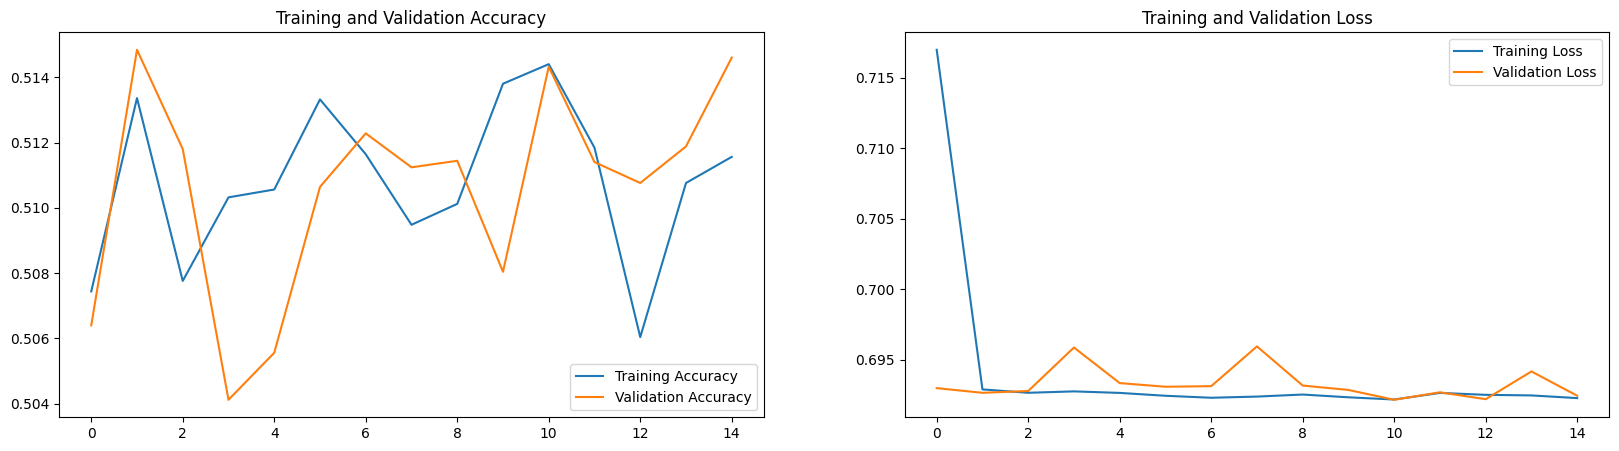

In [110]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Use Of Embedding in the Sentiment Analysis

In [111]:
len(tokenizer.word_index)

17

In [122]:
model1 = Sequential()
model1.add(Embedding(17,output_dim=2,input_length=5))

model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 5, 2)              36        
                                                                 
Total params: 36 (144.00 Byte)
Trainable params: 36 (144.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [123]:
model1.compile('adam' , 'accuracy')

In [124]:
sequences

array([[ 9,  1,  0,  0,  0],
       [ 1,  1,  0,  0,  0],
       [ 3,  3, 10,  0,  0],
       [ 2, 11,  2,  1,  2],
       [12, 13,  4,  5,  0],
       [ 6,  6,  0,  0,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [14, 15,  4,  5,  0],
       [16, 17,  0,  0,  0]], dtype=int32)

In [125]:
len(sequences)

10

In [126]:
pred = model1.predict(sequences)
pred

1/1 [==============================] - 0s 38ms/step


array([[[ 0.01673872, -0.04822008],
        [ 0.04125312,  0.00968844],
        [ 0.00684216,  0.01917427],
        [ 0.00684216,  0.01917427],
        [ 0.00684216,  0.01917427]],

       [[ 0.04125312,  0.00968844],
        [ 0.04125312,  0.00968844],
        [ 0.00684216,  0.01917427],
        [ 0.00684216,  0.01917427],
        [ 0.00684216,  0.01917427]],

       [[-0.01252057, -0.00157908],
        [-0.01252057, -0.00157908],
        [-0.01281106, -0.04307679],
        [ 0.00684216,  0.01917427],
        [ 0.00684216,  0.01917427]],

       [[-0.01065701, -0.04321397],
        [-0.0104941 ,  0.00845852],
        [-0.01065701, -0.04321397],
        [ 0.04125312,  0.00968844],
        [-0.01065701, -0.04321397]],

       [[-0.04175807,  0.02206591],
        [ 0.04324153,  0.03223646],
        [-0.00112549, -0.0180419 ],
        [ 0.00707942,  0.04283645],
        [ 0.00684216,  0.01917427]],

       [[ 0.01629214,  0.03584428],
        [ 0.01629214,  0.03584428],
        [ 0.006842

In [135]:
(X_train,y_train),(X_test,y_test) = imdb.load_data()

In [136]:
X_train = pad_sequences(X_train,padding='post',maxlen=100)
X_test = pad_sequences(X_test,padding='post',maxlen=100)

In [137]:
X_train.shape

(25000, 100)

In [140]:
model2 = Sequential()

model2.add(Embedding(1000000,output_dim=2,input_length=100))
model2.add(SimpleRNN(32,return_sequences=False))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 100, 2)            2000000   
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 32)                1120      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2001153 (7.63 MB)
Trainable params: 2001153 (7.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [141]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model2.fit(X_train, y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
782/782 [==============================] - 36s 43ms/step - loss: 0.6874 - accuracy: 0.5490 - val_loss: 0.6572 - val_accuracy: 0.6409
Epoch 2/10
782/782 [==============================] - 34s 43ms/step - loss: 0.4918 - accuracy: 0.7712 - val_loss: 0.4228 - val_accuracy: 0.8192
Epoch 3/10
782/782 [==============================] - 32s 40ms/step - loss: 0.3209 - accuracy: 0.8714 - val_loss: 0.4129 - val_accuracy: 0.8174
Epoch 4/10
782/782 [==============================] - 33s 43ms/step - loss: 0.2246 - accuracy: 0.9183 - val_loss: 0.4069 - val_accuracy: 0.8342
Epoch 5/10
782/782 [==============================] - 32s 41ms/step - loss: 0.1621 - accuracy: 0.9451 - val_loss: 0.4380 - val_accuracy: 0.8358
Epoch 6/10
782/782 [==============================] - 32s 41ms/step - loss: 0.1169 - accuracy: 0.9626 - val_loss: 0.4922 - val_accuracy: 0.8291
Epoch 7/10
782/782 [==============================] - 33s 42ms/step - loss: 0.0929 - accuracy: 0.9704 - val_loss: 0.5488 - val_accuracy:

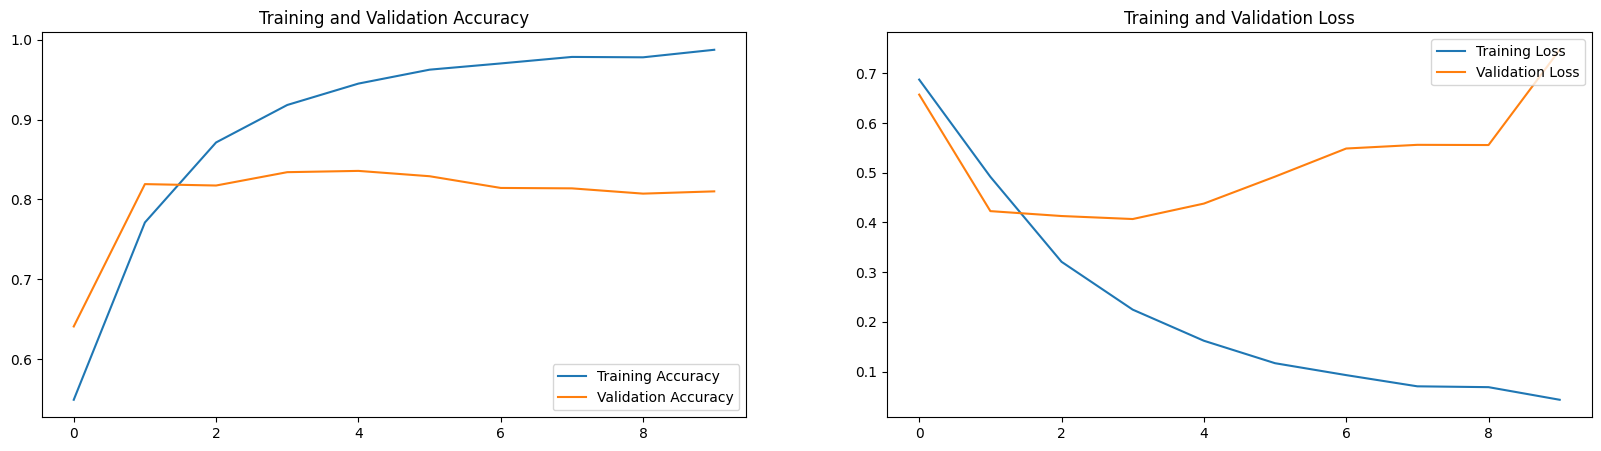

In [142]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()